In [7]:
import numpy as np
import matplotlib.pyplot as plt
import logging

from experiments import Experiments

In [8]:
# Set up logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

# Experiments
### Fixed $c$, increasing dimensions

In the following section I will test the algorithm's accuracy on matrices where the matching dimensions are increased, and everything else stays constant.
$$ $$
Random matrices with entries in $\[0,1\]$, sparse (density = 0.01) and dense
$ \delta = 0.05 \quad c = 50 \quad$ For dimensions 50 -> 1000 with increment of 50.

In [9]:
# Gather results
dimensions = [] + list(range(50, 1001, 50))
fix_dim = 100

a_dims = np.column_stack((np.full(len(dimensions), fill_value=fix_dim), dimensions))
b_dims = np.column_stack((dimensions, np.full(len(dimensions), fill_value=fix_dim)))

print("Calculating with options: dense, opt")
errors1, bounds1 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "dense",
                                                  prob_dist_type = "opt",
                                                  delta = 0.05)

print("Calculating with options: sparse, opt")
errors2, bounds2 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "sparse",
                                                  prob_dist_type = "opt",
                                                  delta = 0.05)

print("Calculating with options: dense, uniform")
errors3, bounds3 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "dense",
                                                  prob_dist_type = "uniform",
                                                  delta = 0.05)

print("Calculating with options: sparse, uniform")
errors4, bounds4 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "sparse",
                                                  prob_dist_type = "uniform",
                                                  delta = 0.05)

DEBUG:root:Generating optimal probability distribution for BMM A: (100, 50); B: (50, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 50); B: (50, 100)) generated in 73.06289672851562ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating with options: dense, opt
Calculating for A: (100 x 50)   B: (50 x 100)
Calculating for A: (100 x 100)   B: (100 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 278.9878845214844ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 150); B: (150, 100)...


Calculating for A: (100 x 150)   B: (150 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 150); B: (150, 100)) generated in 329.6370506286621ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 200); B: (200, 100)...


Calculating for A: (100 x 200)   B: (200 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 200); B: (200, 100)) generated in 427.8068542480469ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 250); B: (250, 100)...


Calculating for A: (100 x 250)   B: (250 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 250); B: (250, 100)) generated in 496.6757297515869ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 300); B: (300, 100)...


Calculating for A: (100 x 300)   B: (300 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 300); B: (300, 100)) generated in 500.52690505981445ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 350); B: (350, 100)...


Calculating for A: (100 x 350)   B: (350 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 350); B: (350, 100)) generated in 598.9859104156494ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 400); B: (400, 100)...


Calculating for A: (100 x 400)   B: (400 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 400); B: (400, 100)) generated in 675.9028434753418ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 450); B: (450, 100)...


Calculating for A: (100 x 450)   B: (450 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 450); B: (450, 100)) generated in 707.8709602355957ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 500); B: (500, 100)...


Calculating for A: (100 x 500)   B: (500 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 500); B: (500, 100)) generated in 769.7291374206543ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 550); B: (550, 100)...


Calculating for A: (100 x 550)   B: (550 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 550); B: (550, 100)) generated in 833.6880207061768ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 600); B: (600, 100)...


Calculating for A: (100 x 600)   B: (600 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 600); B: (600, 100)) generated in 874.8841285705566ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 650); B: (650, 100)...


Calculating for A: (100 x 650)   B: (650 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 650); B: (650, 100)) generated in 946.2919235229492ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 700); B: (700, 100)...


Calculating for A: (100 x 700)   B: (700 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 700); B: (700, 100)) generated in 947.3919868469238ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 750); B: (750, 100)...


Calculating for A: (100 x 750)   B: (750 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 750); B: (750, 100)) generated in 1058.9141845703125ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 800); B: (800, 100)...


Calculating for A: (100 x 800)   B: (800 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 800); B: (800, 100)) generated in 1148.3640670776367ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 850); B: (850, 100)...


Calculating for A: (100 x 850)   B: (850 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 850); B: (850, 100)) generated in 1177.4709224700928ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 900); B: (900, 100)...


Calculating for A: (100 x 900)   B: (900 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 900); B: (900, 100)) generated in 1257.8539848327637ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 950); B: (950, 100)...


Calculating for A: (100 x 950)   B: (950 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 950); B: (950, 100)) generated in 1328.8929462432861ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 1000); B: (1000, 100)...


Calculating for A: (100 x 1000)   B: (1000 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 1000); B: (1000, 100)) generated in 1368.3581352233887ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 50); B: (50, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 50); B: (50, 100)) generated in 61.5231990814209ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating with options: sparse, opt
Calculating for A: (100 x 50)   B: (50 x 100)
Calculating for A: (100 x 100)   B: (100 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 127.03585624694824ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 150); B: (150, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 150); B: (150, 100)) generated in 128.49688529968262ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 200); B: (200, 100)...


Calculating for A: (100 x 150)   B: (150 x 100)
Calculating for A: (100 x 200)   B: (200 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 200); B: (200, 100)) generated in 217.19717979431152ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 250); B: (250, 100)...


Calculating for A: (100 x 250)   B: (250 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 250); B: (250, 100)) generated in 271.8470096588135ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 300); B: (300, 100)...


Calculating for A: (100 x 300)   B: (300 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 300); B: (300, 100)) generated in 261.16204261779785ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 350); B: (350, 100)...


Calculating for A: (100 x 350)   B: (350 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 350); B: (350, 100)) generated in 330.13415336608887ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 400); B: (400, 100)...


Calculating for A: (100 x 400)   B: (400 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 400); B: (400, 100)) generated in 336.56883239746094ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 450); B: (450, 100)...


Calculating for A: (100 x 450)   B: (450 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 450); B: (450, 100)) generated in 386.8730068206787ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 500); B: (500, 100)...


Calculating for A: (100 x 500)   B: (500 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 500); B: (500, 100)) generated in 406.77618980407715ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 550); B: (550, 100)...


Calculating for A: (100 x 550)   B: (550 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 550); B: (550, 100)) generated in 451.1377811431885ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 600); B: (600, 100)...


Calculating for A: (100 x 600)   B: (600 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 600); B: (600, 100)) generated in 496.248722076416ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 650); B: (650, 100)...


Calculating for A: (100 x 650)   B: (650 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 650); B: (650, 100)) generated in 466.86840057373047ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 700); B: (700, 100)...


Calculating for A: (100 x 700)   B: (700 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 700); B: (700, 100)) generated in 503.41200828552246ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 750); B: (750, 100)...


Calculating for A: (100 x 750)   B: (750 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 750); B: (750, 100)) generated in 528.0768871307373ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 800); B: (800, 100)...


Calculating for A: (100 x 800)   B: (800 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 800); B: (800, 100)) generated in 564.2681121826172ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 850); B: (850, 100)...


Calculating for A: (100 x 850)   B: (850 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 850); B: (850, 100)) generated in 566.2698745727539ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 900); B: (900, 100)...


Calculating for A: (100 x 900)   B: (900 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 900); B: (900, 100)) generated in 601.2759208679199ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 950); B: (950, 100)...


Calculating for A: (100 x 950)   B: (950 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 950); B: (950, 100)) generated in 627.5219917297363ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 1000); B: (1000, 100)...


Calculating for A: (100 x 1000)   B: (1000 x 100)


DEBUG:root:Optimal probability distribution for BMM (A: (100, 1000); B: (1000, 100)) generated in 619.4219589233398ms!
DEBUG:root:Getting uniform probability distribution for n=50...
DEBUG:root:Uniform probability distribution for n=50 generated in 0.04601478576660156ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 3.911733627319336ms!
DEBUG:root:Getting uniform probability distribution for n=150...
DEBUG:root:Uniform probability distribution for n=150 generated in 0.025272369384765625ms!
DEBUG:root:Getting uniform probability distribution for n=200...
DEBUG:root:Uniform probability distribution for n=200 generated in 0.033855438232421875ms!
DEBUG:root:Getting uniform probability distribution for n=250...
DEBUG:root:Uniform probability distribution for n=250 generated in 0.0171661376953125ms!
DEBUG:root:Getting uniform probability distribution for n=300...
DEBUG:root:Uniform probability distribution 

Calculating with options: dense, uniform
Calculating for A: (100 x 50)   B: (50 x 100)
Calculating for A: (100 x 100)   B: (100 x 100)
Calculating for A: (100 x 150)   B: (150 x 100)
Calculating for A: (100 x 200)   B: (200 x 100)
Calculating for A: (100 x 250)   B: (250 x 100)
Calculating for A: (100 x 300)   B: (300 x 100)
Calculating for A: (100 x 350)   B: (350 x 100)
Calculating for A: (100 x 400)   B: (400 x 100)
Calculating for A: (100 x 450)   B: (450 x 100)
Calculating for A: (100 x 500)   B: (500 x 100)
Calculating for A: (100 x 550)   B: (550 x 100)
Calculating for A: (100 x 600)   B: (600 x 100)
Calculating for A: (100 x 650)   B: (650 x 100)


DEBUG:root:Getting uniform probability distribution for n=700...
DEBUG:root:Uniform probability distribution for n=700 generated in 0.026226043701171875ms!
DEBUG:root:Getting uniform probability distribution for n=750...
DEBUG:root:Uniform probability distribution for n=750 generated in 0.1518726348876953ms!
DEBUG:root:Getting uniform probability distribution for n=800...
DEBUG:root:Uniform probability distribution for n=800 generated in 0.02002716064453125ms!
DEBUG:root:Getting uniform probability distribution for n=850...
DEBUG:root:Uniform probability distribution for n=850 generated in 0.023126602172851562ms!
DEBUG:root:Getting uniform probability distribution for n=900...
DEBUG:root:Uniform probability distribution for n=900 generated in 0.022172927856445312ms!
DEBUG:root:Getting uniform probability distribution for n=950...
DEBUG:root:Uniform probability distribution for n=950 generated in 0.026702880859375ms!
DEBUG:root:Getting uniform probability distribution for n=1000...
DEBU

Calculating for A: (100 x 700)   B: (700 x 100)
Calculating for A: (100 x 750)   B: (750 x 100)
Calculating for A: (100 x 800)   B: (800 x 100)
Calculating for A: (100 x 850)   B: (850 x 100)
Calculating for A: (100 x 900)   B: (900 x 100)
Calculating for A: (100 x 950)   B: (950 x 100)
Calculating for A: (100 x 1000)   B: (1000 x 100)
Calculating with options: sparse, uniform
Calculating for A: (100 x 50)   B: (50 x 100)
Calculating for A: (100 x 100)   B: (100 x 100)
Calculating for A: (100 x 150)   B: (150 x 100)


DEBUG:root:Getting uniform probability distribution for n=200...
DEBUG:root:Uniform probability distribution for n=200 generated in 0.009059906005859375ms!
DEBUG:root:Getting uniform probability distribution for n=250...
DEBUG:root:Uniform probability distribution for n=250 generated in 0.02002716064453125ms!
DEBUG:root:Getting uniform probability distribution for n=300...
DEBUG:root:Uniform probability distribution for n=300 generated in 0.014066696166992188ms!
DEBUG:root:Getting uniform probability distribution for n=350...
DEBUG:root:Uniform probability distribution for n=350 generated in 0.017881393432617188ms!
DEBUG:root:Getting uniform probability distribution for n=400...
DEBUG:root:Uniform probability distribution for n=400 generated in 0.01811981201171875ms!
DEBUG:root:Getting uniform probability distribution for n=450...
DEBUG:root:Uniform probability distribution for n=450 generated in 0.02193450927734375ms!
DEBUG:root:Getting uniform probability distribution for n=500...
DE

Calculating for A: (100 x 200)   B: (200 x 100)
Calculating for A: (100 x 250)   B: (250 x 100)
Calculating for A: (100 x 300)   B: (300 x 100)
Calculating for A: (100 x 350)   B: (350 x 100)
Calculating for A: (100 x 400)   B: (400 x 100)
Calculating for A: (100 x 450)   B: (450 x 100)
Calculating for A: (100 x 500)   B: (500 x 100)
Calculating for A: (100 x 550)   B: (550 x 100)
Calculating for A: (100 x 600)   B: (600 x 100)
Calculating for A: (100 x 650)   B: (650 x 100)
Calculating for A: (100 x 700)   B: (700 x 100)


DEBUG:root:Getting uniform probability distribution for n=750...
DEBUG:root:Uniform probability distribution for n=750 generated in 0.029802322387695312ms!
DEBUG:root:Getting uniform probability distribution for n=800...
DEBUG:root:Uniform probability distribution for n=800 generated in 0.02384185791015625ms!
DEBUG:root:Getting uniform probability distribution for n=850...
DEBUG:root:Uniform probability distribution for n=850 generated in 0.02288818359375ms!
DEBUG:root:Getting uniform probability distribution for n=900...
DEBUG:root:Uniform probability distribution for n=900 generated in 0.02002716064453125ms!
DEBUG:root:Getting uniform probability distribution for n=950...
DEBUG:root:Uniform probability distribution for n=950 generated in 0.024080276489257812ms!
DEBUG:root:Getting uniform probability distribution for n=1000...
DEBUG:root:Uniform probability distribution for n=1000 generated in 0.024080276489257812ms!


Calculating for A: (100 x 750)   B: (750 x 100)
Calculating for A: (100 x 800)   B: (800 x 100)
Calculating for A: (100 x 850)   B: (850 x 100)
Calculating for A: (100 x 900)   B: (900 x 100)
Calculating for A: (100 x 950)   B: (950 x 100)
Calculating for A: (100 x 1000)   B: (1000 x 100)


### Fix 100x100 dimension, but c is increased

In [10]:
# Gather results
c_vals = np.array([] + list(range(5, 101, 5)))
shape_a = (100, 100)
shape_b = (100, 100)

print("Calculating with options: dense, opt")
errors1, bounds1 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="dense",
                                                    prob_dist_type="opt",
                                                    delta=0.01)

print("Calculating with options: sparse, opt")
errors2, bounds2 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="sparse",
                                                    prob_dist_type="opt",
                                                    delta=0.01)

print("Calculating with options: dense, uniform")
errors3, bounds3 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="dense",
                                                    prob_dist_type="uniform",
                                                    delta=0.01)

print("Calculating with options: sparse, uniform")
errors4, bounds4 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="sparse",
                                                    prob_dist_type="uniform",
                                                    delta=0.01)

DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating with options: dense, opt
Calculating for c = 5...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 344.573974609375ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 10...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 298.7861633300781ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 15...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 273.3461856842041ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 20...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 292.1030521392822ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 25...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 258.11004638671875ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 30...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 229.50506210327148ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 182.55090713500977ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 35...
Calculating for c = 40...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 257.75885581970215ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 45...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 234.93003845214844ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 50...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 209.34486389160156ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 55...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 232.37895965576172ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 60...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 275.6540775299072ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 189.07880783081055ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 65...
Calculating for c = 70...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 187.89076805114746ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 75...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 240.57817459106445ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 80...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 267.7128314971924ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 85...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 291.07213020324707ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 90...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 245.73612213134766ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 95...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 298.54607582092285ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 100...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 272.65310287475586ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 120.98169326782227ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating with options: sparse, opt
Calculating for c = 5...
Calculating for c = 10...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 109.63797569274902ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 95.46804428100586ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 15...
Calculating for c = 20...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 150.3159999847412ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 88.27018737792969ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 82.59105682373047ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 25...
Calculating for c = 30...
Calculating for c = 35...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 81.49909973144531ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 106.6732406616211ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 40...
Calculating for c = 45...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 118.62325668334961ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 107.02276229858398ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 50...
Calculating for c = 55...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 121.17505073547363ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 104.4459342956543ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 60...
Calculating for c = 65...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 100.87394714355469ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 101.37510299682617ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 70...
Calculating for c = 75...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 123.57807159423828ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 111.90605163574219ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 80...
Calculating for c = 85...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 123.11005592346191ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 109.25507545471191ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...


Calculating for c = 90...
Calculating for c = 95...


DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 121.98495864868164ms!
DEBUG:root:Generating optimal probability distribution for BMM A: (100, 100); B: (100, 100)...
DEBUG:root:Optimal probability distribution for BMM (A: (100, 100); B: (100, 100)) generated in 112.94293403625488ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.0247955322265625ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.027894973754882812ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.022172927856445312ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.024080276489257812ms!
DEBUG:root:Getting uniform probability distribu

Calculating for c = 100...
Calculating with options: dense, uniform
Calculating for c = 5...
Calculating for c = 10...
Calculating for c = 15...
Calculating for c = 20...
Calculating for c = 25...


DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.0171661376953125ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.03314018249511719ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.024080276489257812ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.024080276489257812ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.025033950805664062ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.017881393432617188ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DE

Calculating for c = 30...
Calculating for c = 35...
Calculating for c = 40...
Calculating for c = 45...
Calculating for c = 50...
Calculating for c = 55...
Calculating for c = 60...
Calculating for c = 65...
Calculating for c = 70...
Calculating for c = 75...
Calculating for c = 80...
Calculating for c = 85...
Calculating for c = 90...
Calculating for c = 95...


DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.019073486328125ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.017881393432617188ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.016689300537109375ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.022172927856445312ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.019073486328125ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.02193450927734375ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:

Calculating for c = 100...
Calculating with options: sparse, uniform
Calculating for c = 5...
Calculating for c = 10...
Calculating for c = 15...
Calculating for c = 20...
Calculating for c = 25...
Calculating for c = 30...
Calculating for c = 35...
Calculating for c = 40...
Calculating for c = 45...
Calculating for c = 50...
Calculating for c = 55...
Calculating for c = 60...
Calculating for c = 65...


DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.019073486328125ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.02002716064453125ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.02193450927734375ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.031948089599609375ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.015735626220703125ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBUG:root:Uniform probability distribution for n=100 generated in 0.010013580322265625ms!
DEBUG:root:Getting uniform probability distribution for n=100...
DEBU

Calculating for c = 70...
Calculating for c = 75...
Calculating for c = 80...
Calculating for c = 85...
Calculating for c = 90...
Calculating for c = 95...
Calculating for c = 100...


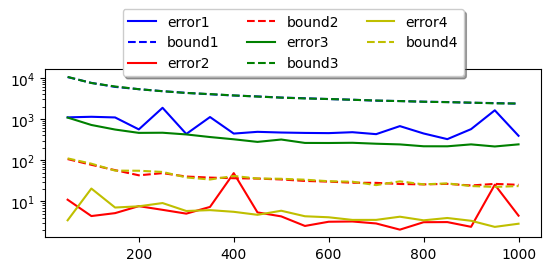

In [11]:
# Eliminate matplotlib log output
logger.setLevel(logging.WARN)

# Plot results

fig = plt.figure()
yerr = np.linspace(1, 1, 100_000)
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')

plt.errorbar(dimensions, errors1, label='error1', color='b')
plt.errorbar(dimensions, bounds1, label='bound1', uplims=True, fmt='--', color='b')

plt.errorbar(dimensions, errors2, label='error2', color='r')
plt.errorbar(dimensions, bounds2, uplims=True, label='bound2', fmt="--", color='r')

plt.errorbar(dimensions, errors3, label='error3', color='g')
plt.errorbar(dimensions, bounds3, uplims=True, label='bound3', fmt="--", color='g')

plt.errorbar(dimensions, errors4, label='error4', color='y')
plt.errorbar(dimensions, bounds4, uplims=True, label='bound4', fmt="--", color='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)